# Invastigating the Titanic Passenger Data

## 0. Table of Contents

###   1. Introduction
    1.1 Dataset Choice
    1.2 Dataset Description
    1.3 Questions
###   2. Data Wrangling
    2.1 Investigating Data
    2.2 Missing Values
###   3. Answering Questions
    3.1 Is the survival of a passenger related to his sex?
    3.2 Is the survival of a passenger related to his age?
    3.3 Did the Passenger Class (Pclass) affected the survival rate?
    3.4 How age, sex and Socio-economic Class combined affect the chances of a passenger's survival?
### 4. Conclusions

### 5. References   
 
 
 
 


## 1. Introduction

#### 1.1 Dataset Choice

I decided to investigate the Titanic dataset, beacause it seems like a fasignating subject to explore. 

The sinking of the  Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

#### 1.2 Dataset Description

The Titanic dataset contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. The variables included are:

* **Survived**: Outcome of survival (0 = No; 1 = Yes)
* **Pclass**: Socio-economic Class (1 = Upper class; 2 = Middle class; 3 = Lower class)
* **Name**: Name of the passenger
* **Sex**: Sex of the passenger
* **Age**: Age of the passenger               
* **Sibsp**: Number of siblings & spouses of the passenger aboard
* **Parch**: Number of parents & Children of the passenger aboard
* **Ticket**: Ticket Number of the passenger
* **Fare**: Fare paid by the passenger
* **Cabin**: Cabin number of the passenger (Some entries contain NaN)
* **Embarked**: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

**SPECIAL NOTES**:

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch) some relations were ignored.  The following are the definitions used for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled only with a nanny, therefore parch=0 for them.  As well, some travelled with very close friends or neighbors in a village, however, the definitions do not support such relations.

In [61]:
import pandas as pd
import numpy as np

# read csv data file
titanic = pd.read_csv('titanic_data.csv')
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


#### 1.3 Questions 

The following questions are going to be investigated from multiple points of view: 

* Is the survival of a passenger related to his sex?
* Is the survival of a passenger related to his age?
* Did the pcalss(Passenger Class) affected the survival rate?
* Did a passenger with childs or spouse had more chances of survival?

## 2. Data Wrangling 

#### 2.1 Investigating data

To investigate the abovementioned questions, not all given fields will be needed. Thus we are only going to keep the ones relevant to our investigation objectives.

In [62]:
# Top 5 rows of the data
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
# Delete fields PassengerId, Name, Ticket, Cabin, Embarked  
titanic = titanic.drop('PassengerId', 1)
titanic = titanic.drop('Name', 1)
titanic = titanic.drop('Ticket', 1)
titanic = titanic.drop('Cabin', 1)
titanic = titanic.drop('Embarked', 1)
titanic.describe(include = "all")

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000
unique,NaN,NaN,2,NaN,NaN,NaN,NaN
top,NaN,NaN,male,NaN,NaN,NaN,NaN
freq,NaN,NaN,577,NaN,NaN,NaN,NaN
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,NaN,NaN,0.000000,0.000000,7.910400
50%,0.000000,3.000000,NaN,NaN,0.000000,0.000000,14.454200
75%,1.000000,3.000000,NaN,NaN,1.000000,0.000000,31.000000


Here we get various critical information about the data, such as count, mean, min, max, standard deviation of every field. 

#### 2.2 Missing Values

By looking into the Age field, we can notice that count equals to 714 and while for every other field it is equal to 891. Obviously there are 177 missing Age values. 

As Age can be an important factor influencing the survival, so we can't ignore it. We should fill some value in all the empty cells of Age column. In this case we decided to delete the lines that correspond to missing values, every time Age field is used.

## 3. Answering questions

#### **3.1 Is the survival of a passenger related to his sex? **

In order to answer this we are going to plot the distribution of survivors based on their sex.

In [64]:
#%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

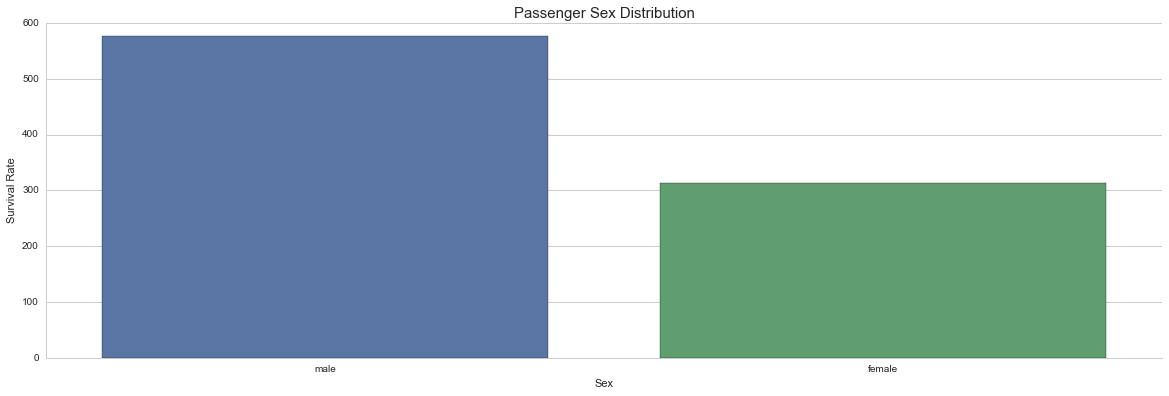

In [89]:
sns.countplot(data=titanic, x="Sex")
plt.title('Passenger Sex Distribution',fontsize=15)
plt.ylabel('Survival Rate')
sns.despine()
sns.plt.show()

The passenger distribution based on their Sex was 577 male (64.8%) and 314 female (35.2%).  

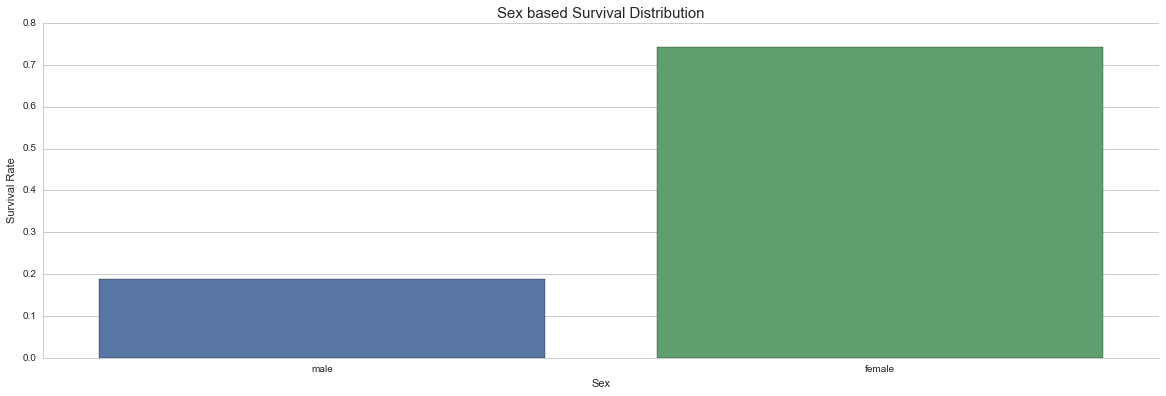

In [91]:
sns.barplot(data=titanic, x="Sex", y="Survived", ci=None)
plt.title('Sex based Survival Distribution',fontsize=15)
plt.ylabel('Survival Rate')
sns.despine()
sns.plt.show()

As we can see in this figure, the probability of survival for women is much bigger than the one for men.

#### **3.2 Is the survival of a passenger related to his age? **

In [67]:
#delete missing values
titanic_minus = titanic[titanic["Age"].notnull()] 

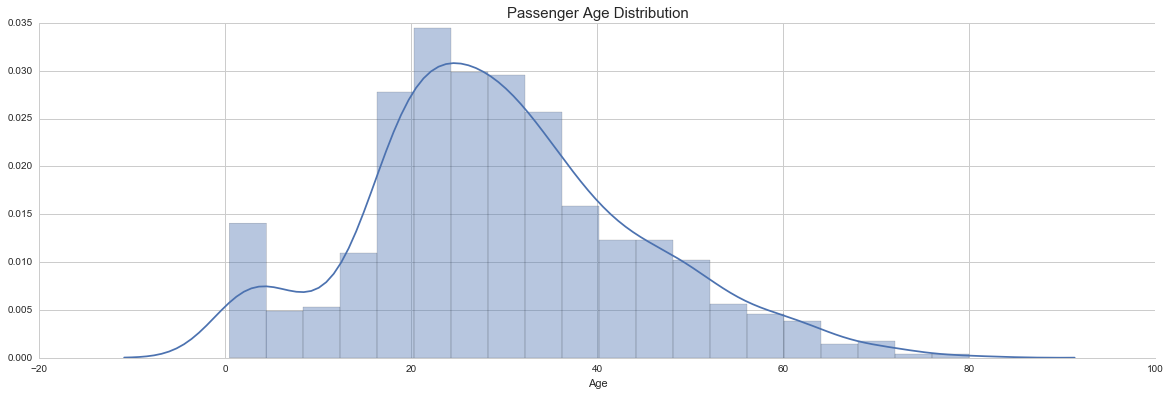

In [92]:
sns.distplot(titanic_minus.Age)
plt.title('Passenger Age Distribution',fontsize=15)
sns.despine()
sns.plt.show()

In this plot one can observe the passenger age distribution.

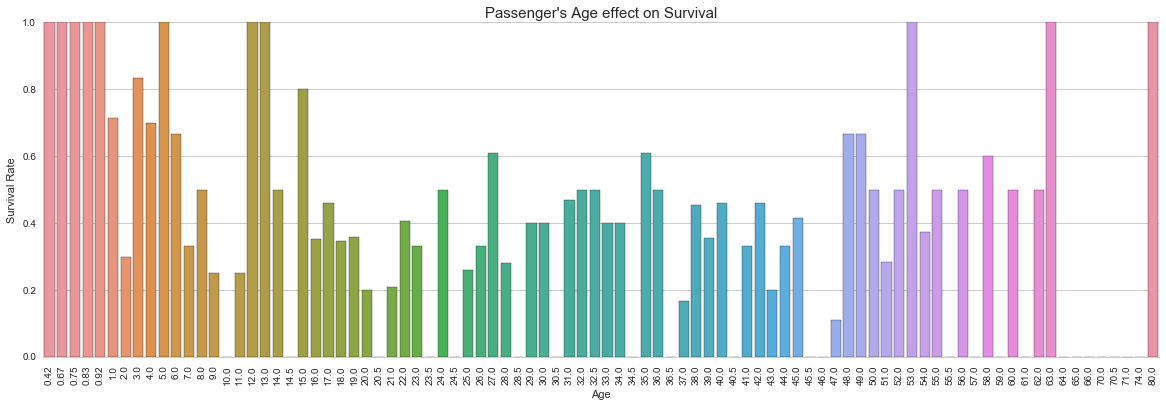

In [93]:
sns.barplot(data=titanic_minus, x="Age", y="Survived", ci=None)
sns.set_context({"figure.figsize": (20, 6)})
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.title("Passenger's Age effect on Survival",fontsize=15)
plt.ylabel('Survival Rate')
sns.despine()
sns.plt.show()

This plot demonstrates the survival rate of passengers per age. Since we can not extract any clear conclusion we can separate passengers on those under 18 years old (Child) and the rest.

In [70]:
def Child_Or_Not(x):
    if x<=18:
        return "Child"
    else:
        return "Adult"
titanic["Child_Or_Not"] = pd.Series(titanic_minus["Age"].apply(Child_Or_Not), index=titanic.index)    

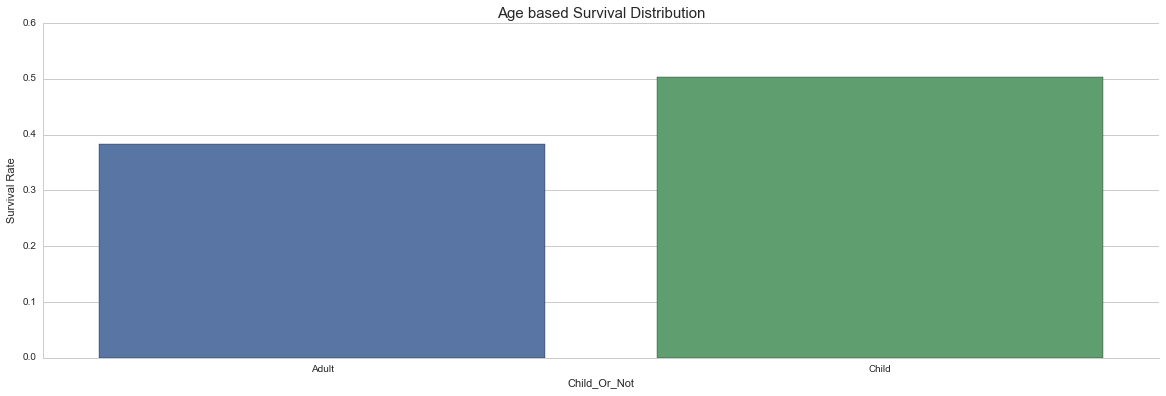

In [94]:
sns.barplot(data=titanic, x="Child_Or_Not", y="Survived", ci=None) 
plt.title('Age based Survival Distribution',fontsize=15)
plt.ylabel('Survival Rate')
sns.despine()
sns.plt.show() 

As we can see in this figure, the probability of survival for children is clearly higher than the one for adults.

#### **3.3 Did the Passenger Class (Pclass) affected the survival rate?**

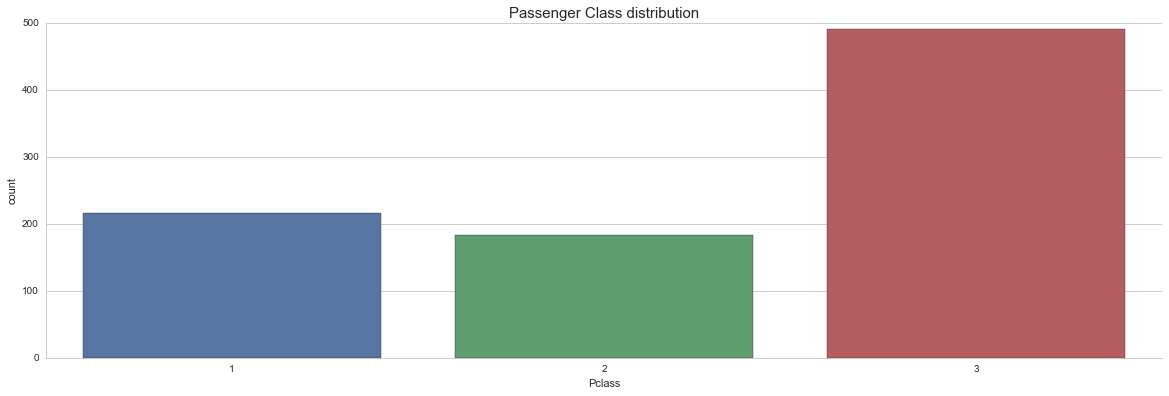

In [96]:
sns.countplot(x="Pclass", data=titanic)
plt.title('Passenger Class distribution',fontsize=15)
sns.despine()
sns.plt.show()

Here we can see the passenger Socio-economic Class distribution, where approximately 55% of the passemgers belong to 3rd Pclass, 24% to Pclass 1 and 21% Pclass 2.

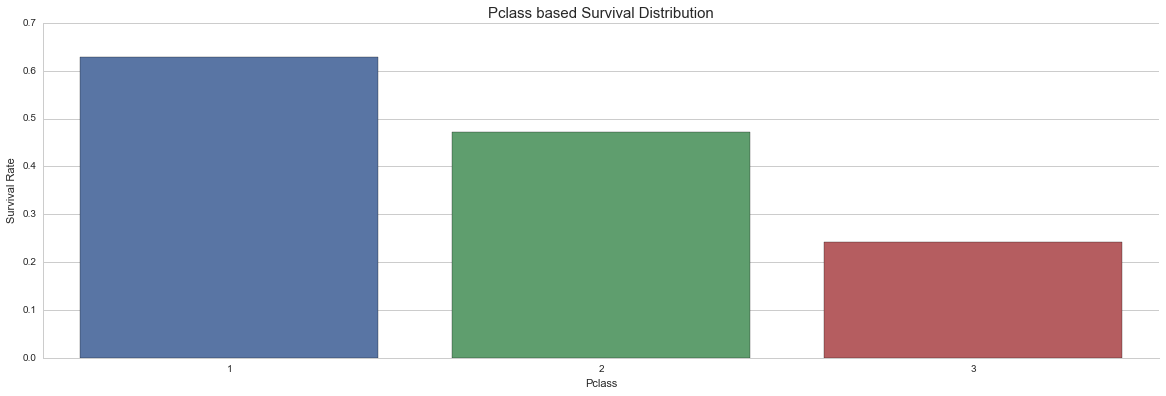

In [97]:
sns.barplot(x="Pclass", y="Survived", data=titanic, ci=None)
plt.title('Pclass based Survival Distribution', fontsize=15)
plt.ylabel('Survival Rate')
sns.despine()
sns.plt.show()

Τhis figure demonstrates the probability of survival based on the passenger's Socio-economic Class. We can clearly notice that passengers that belong to the 1st class had more chances of survival than the ones of 2nd class and much more than the ones of the 3rd class. 

#### **3.4 How age, sex and Socio-economic Class combined affect the chances of a passenger's survival? **

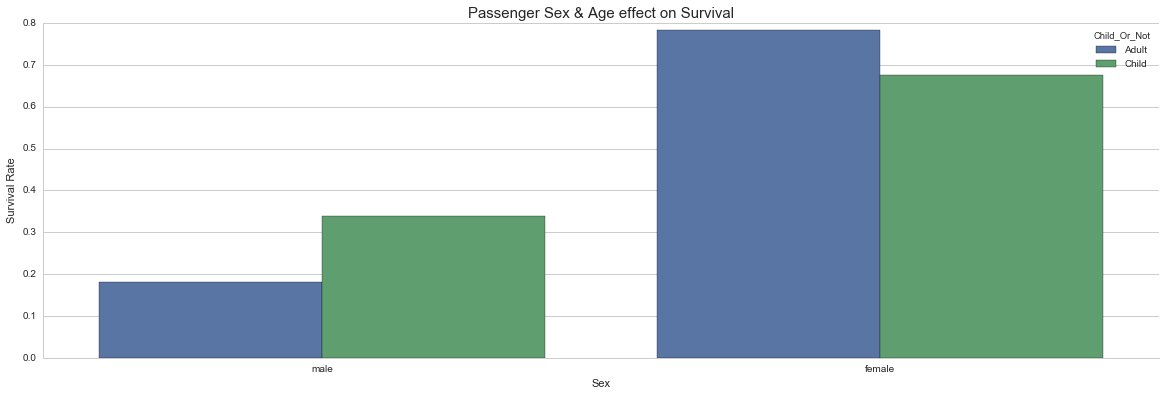

In [98]:
sns.barplot(x="Sex", y="Survived", hue="Child_Or_Not", data=titanic, ci=None)
plt.title('Passenger Sex & Age effect on Survival', fontsize=15)
plt.ylabel('Survival Rate')
sns.despine()
sns.plt.show()

We notice that clearly women had much better chances of survival than men and even boys. Another interesting thing to notice is that adult women had slightly more chances of survival than underage females.   

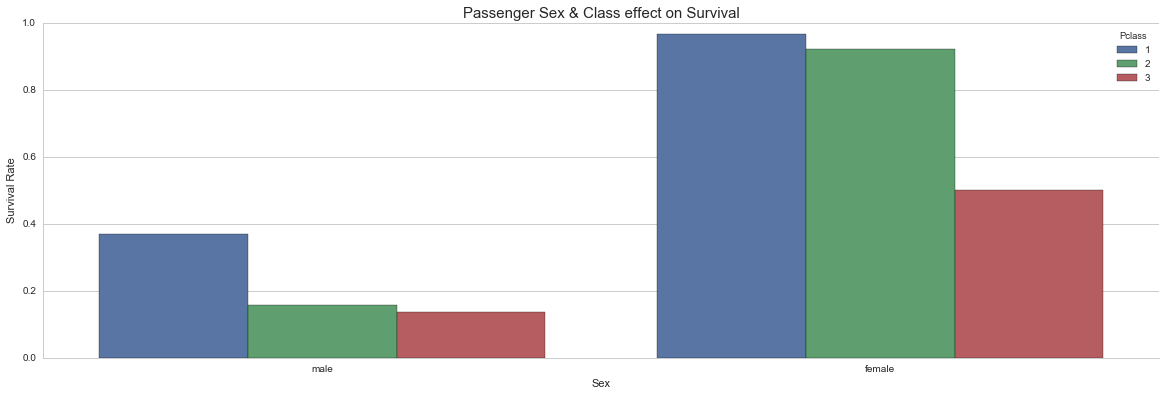

In [99]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=titanic, ci=None)
plt.title('Passenger Sex & Class effect on Survival', fontsize=15)
plt.ylabel('Survival Rate')
sns.despine()
sns.plt.show()

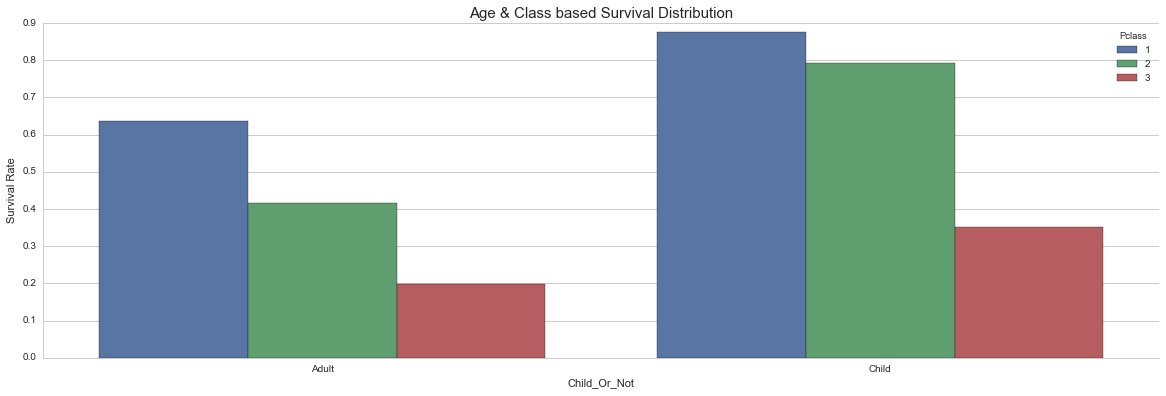

In [101]:
sns.barplot(data=titanic, x="Child_Or_Not", y="Survived", hue="Pclass", ci=None) 
plt.title('Age & Class based Survival Distribution', fontsize=15)
plt.ylabel('Survival Rate')
sns.despine()
sns.plt.show() 

## 4. Conclusions

To conclude this investigation we should highlight the limitations of the analysis conducted. First of all the dataset we used has a significant amount of missing values to the Age field, which I decided to treat by excuding those items from any analysis conteining the Age field, rather than filling those values with median or average values. Another important limitation for our analysis, is the fact that the dataset used contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic, thus we don't know if this sample provides us with accurate results concerning the population. Finally it is important to note that any assumptions made in the current analysis don't inlude any statistical testing, therefore it gives us only a rough picture based on illustrations as well as basic statistical elements provided. 

Having said the above, we can summarize by highlighting the fact that women and children had significant higher survival rates than the ones of men and adults, as well as the fact that passengers of lower Socio-Economic class were more likely not to survive contrary to passengers of higher class. 

## 5. References

https://www.kaggle.com/c/titanic

https://stanford.edu/~mwaskom/software/seaborn/index.html